# Genetic disorders in children

**Context**

Over 9000 rare diseases have been described and up to 350 million people worldwide suffer from one. While individually, these diseases are rare (affecting 5-6% of the population),  in aggregate they represent a substantial challenge to global health systems. The majority of rare disorders are genetic in origin, with children under the age of five disproportionately affected (83%). Due to disease heterogeneity and unknown variant pathogenicity, about half of patients with rare genetic diseases never receive a causal diagnosis. However, making a molecular diagnosis with current technologies and knowledge is often still a challenge.
Thus understanding the clinically implications of genetic and phenotypic variation is crucial for delivering an early diagnose and treatment for these patients.

*Aim :*
Predict genetics disorder and disorder subclass based on medical information about children who suffer from genetic disorders.

**Dataset details**

The raw dataset contains the following files:
- train.csv : 22083 rows x 45 columns
- test.csv : 9465 rows x 43 columns

The columns that are used have the following information:
- Patient Id: Represents the unique identification number of a patient
- Patient Age: Represents the age of a patient
- Genes in mother's side: Represents a gene defect in a patient's mother
- Inherited from father: Represents a gene defect in a patient's father
- Maternal gene: Represents a gene defect in the patient's maternal side of the family
- Paternal gene: Represents a gene defect in a patient's paternal side of the family
- Blood cell count (mcL): Represents the blood cell count of a patient
- Patient First Name: Represents a patient's first name
- Family Name: Represents a patient's family name or surname
- Father's name: Represents a patient's father's name
- Mother's age: Represents a patient's mother's age
- Father's age: Represents a patient's father's age
- Institute Name: Represents the medical institute where a patient was born
- Location of Institute: Represents the location of the medical institute
- Status: Represents whether a patient is deceased
- Respiratory Rate (breaths/min): Represents a patient's respiratory breating rate
- Heart Rate (rates/min): Represents a patient's heart rate
- Test 1 - Test 5: Represents different (masked) tests that were conducted on a patient
- Parental Consent: Represents whether a patient's parents approved the treatment plan
- Follow-up: Represents a patient's level of risk (how intense their condition is)
- Gender: Represents a patient's gender
- Birth asphyxia: Represents whether a patient suffered from birth asphyxia
- Autopsy shows birth defect (if applicable): Represents whether a patient's autopsy showed any birth defects
- Place of birth: Represents whether a patient was born in a medical institute or home
- Folic acid details (peri-conceptional): Represents the periconceptional folic acid supplementation details of a patient
- H/O serious maternal illness: Represents an unexpected outcome of labor and delivery that resulted in significant short or long term consequences to a patient's mother
- H/O radiation exposure (x-ray): Represents whether a patient has any radiation exposure history
- H/O substance abuse: Represents whether a parent has a history of drug addiction
- Assisted conception IVF/ART: Represents the type of treatment used for infertility
- History of anomalies in previous pregnancies: Represents whether the mother had any anomalies in her previous pregnancies
- No. of previous abortion: Represents the number of abortions that a mother had
- Birth defects: Represents whether a patient has birth defects
- White Blood cell count (thousand per microliter): Represents a patient's white blood test results
- Blood test result: Represents a patient's blood test results
- Symptom 1 - Symptom 5: Represents (masked) different types of symptoms that a patient had
- Genetic Disorder: Represents the genetic disorder that a patient has
- Disorder Subclass: Represents the subclass of the disorder

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
import pickle


from warnings import filterwarnings
filterwarnings('ignore')

In [33]:
# Load the data
df_original = pd.read_csv("../data/raw/train.csv")

# Copy the data so as not to modify the original information and visualize it
df = df_original.copy()
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [34]:
# Delete the personal information columns in order to work with anonimous data, as well as parental consent and medical institution name and location which are not relevant
df1 = df.drop(["Patient Id", "Patient First Name", "Family Name", "Father's name", "Parental consent", "Institute Name", "Location of Institute"], axis=1)

# Test columns only have either 0 or missing values, not information we could use so these columns were deleted
df1 = df1.drop(["Test 1", "Test 2", "Test 3", "Test 4", "Test 5"], axis=1)

# Observe the remaining information of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [35]:
# Rename the columns
df1.rename(columns={"Patient Age": "Patient_Age", "Genes in mother's side": "Mother_inherit", "Inherited from father": "Father_inherit",
                    "Maternal gene": "Maternal_gene", "Paternal gene": "Paternal_gene", "Blood cell count (mcL)": "Blood_cell_count",
                    "Mother's age": "Mother_age", "Father's age": "Father_age", "Respiratory Rate (breaths/min)": "Respiratory_rate",
                    "Heart Rate (rates/min": "Heart_rate", "Follow-up": "Follow_up", "Birth asphyxia": "Birth_asphyxia", "Autopsy shows birth defect (if applicable)": "Autopsy_birth_defect",
                    "Place of birth": "Place_birth", "Folic acid details (peri-conceptional)": "Folic_acid", "H/O serious maternal illness": "Maternal_illness",
                    "H/O radiation exposure (x-ray)": "Radiation_exposure", "H/O substance abuse": "Substance_abuse",
                    "Assisted conception IVF/ART": "Assisted_conception", "History of anomalies in previous pregnancies": "History_previous_pregnancies",
                    "No. of previous abortion": "Number_abortions", "Birth defects": "Birth_defects", "White Blood cell count (thousand per microliter)": "WBC_count",
                    "Blood test result": "Blood_test", 'Symptom 1': 'Symptom1', 'Symptom 2': 'Symptom2', 'Symptom 3': 'Symptom3', 'Symptom 4': 'Symptom4', 'Symptom 5': 'Symptom5',
                    "Genetic Disorder": "Genetic_disorder", "Disorder Subclass": "Disorder_subclass"}, inplace=True)

Working with missing information

In [36]:
# Replacing missing information categories to NaN
df1["Birth_asphyxia"] = df1["Birth_asphyxia"].replace("No record",np.NaN)
df1["Birth_asphyxia"] = df1["Birth_asphyxia"].replace("Not available",np.NaN)

df1["Autopsy_birth_defect"] = df1["Autopsy_birth_defect"].replace("None",np.NaN)
df1["Autopsy_birth_defect"] = df1["Autopsy_birth_defect"].replace("Not applicable",np.NaN)

df1["Radiation_exposure"] = df1["Radiation_exposure"].replace("-",np.NaN)
df1["Radiation_exposure"] = df1["Radiation_exposure"].replace("Not applicable",np.NaN)

df1["Substance_abuse"] = df1["Substance_abuse"].replace("-",np.NaN)
df1["Substance_abuse"] = df1["Substance_abuse"].replace("Not applicable",np.NaN)

In [37]:
# The missing data in each of these columns represent more than half of the rows, so its reasonable to drop them
df1.drop(['Birth_asphyxia','Autopsy_birth_defect','Radiation_exposure','Substance_abuse'], axis=1, inplace=True)

In [38]:
# The aim is to predict the Genetic Disorder and Disorder Subclass a patient has.
# If the patient has no value in the Genetic Disorder and Disorder Subclass columns for the training data, we can assume that the genetic disease is unknown or not present.
# Either way, we can drop the rows with missing values.

df1.dropna(subset=["Genetic_disorder", "Disorder_subclass"], axis=0, inplace=True)

In [39]:
# Categorical columns
df1["Maternal_gene"].fillna(df1["Maternal_gene"].mode()[0], inplace=True)
df1["History_previous_pregnancies"].fillna(df1["History_previous_pregnancies"].mode()[0], inplace=True)
df1["Place_birth"].fillna(df1["Place_birth"].mode()[0], inplace=True)
df1["Assisted_conception"].fillna(df1["Assisted_conception"].mode()[0], inplace=True)
df1["Follow_up"].fillna(df1["Follow_up"].mode()[0], inplace=True)
df1["Gender"].fillna(df1["Gender"].mode()[0], inplace=True)
df1["Respiratory_rate"].fillna(df1["Respiratory_rate"].mode()[0], inplace=True)
df1["Birth_defects"].fillna(df1["Birth_defects"].mode()[0], inplace=True)
df1["Folic_acid"].fillna(df1["Folic_acid"].mode()[0], inplace=True)
df1["Blood_test"].fillna(df1["Blood_test"].mode()[0], inplace=True)
df1["Maternal_illness"].fillna(df1["Maternal_illness"].mode()[0], inplace=True)
df1["Heart_rate"].fillna(df1["Heart_rate"].mode()[0], inplace=True)
df1["Father_inherit"].fillna(df1["Father_inherit"].mode()[0], inplace=True)
# Symptom columns are boolean values in integer format, so missing values will be replace by the most frequent value in the column as the rest of the categorical data
df1["Symptom1"].fillna(df1["Symptom1"].mode()[0], inplace=True)
df1["Symptom2"].fillna(df1["Symptom2"].mode()[0], inplace=True)
df1["Symptom3"].fillna(df1["Symptom3"].mode()[0], inplace=True)
df1["Symptom4"].fillna(df1["Symptom4"].mode()[0], inplace=True)
df1["Symptom5"].fillna(df1["Symptom5"].mode()[0], inplace=True)


# Numerical columns
df1["Mother_age"].fillna(df1.groupby(["Disorder_subclass"])["Mother_age"].transform("mean"),inplace=True)
df1["Father_age"].fillna(df1.groupby(["Disorder_subclass"])["Father_age"].transform("mean"),inplace=True)
df1["WBC_count"].fillna(df1.groupby(["Disorder_subclass"])["WBC_count"].transform("mean"),inplace=True)
df1["Patient_Age"].fillna(df1.groupby(["Disorder_subclass"])["Patient_Age"].transform("mean"),inplace=True)
df1["Number_abortions"].fillna(df1.groupby(["Disorder_subclass"])["Number_abortions"].transform("mean"),inplace=True)

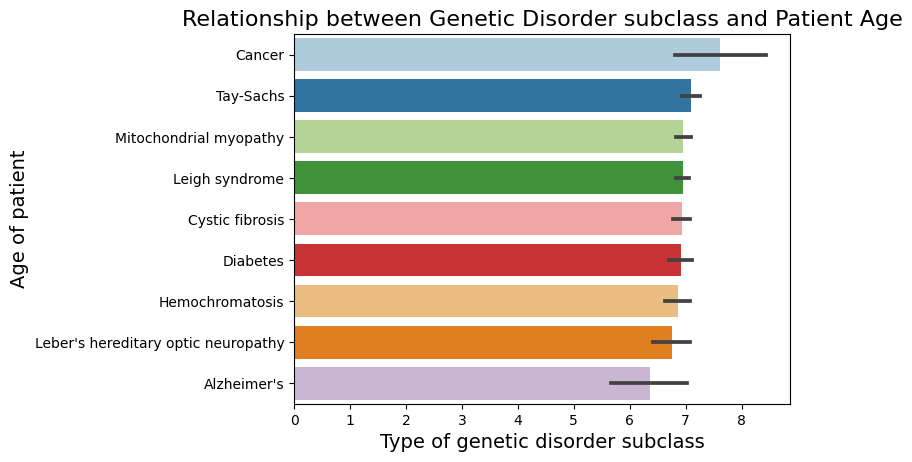

In [40]:
df_bar = df1[['Patient_Age', 'Disorder_subclass']]
result = df_bar.groupby('Disorder_subclass')['Patient_Age'].mean().sort_values(ascending=False)

sns.barplot(data = df_bar, x = 'Patient_Age', y = 'Disorder_subclass',
            palette = 'Paired', order = result.index)
plt.xlabel("Type of genetic disorder subclass", size=14)
plt.ylabel("Age of patient", size=14)
plt.title('Relationship between Genetic Disorder subclass and Patient Age', size=16)

plt.savefig('../images/DisorderSubclass_Age.png')

In [41]:
numeric_cols = df1.select_dtypes(include=[np.number]).columns
categoric_cols = df1.select_dtypes(exclude=[np.number]).columns

# Encode categorical columns
le = LabelEncoder()
df2 = df1.copy()
df2[categoric_cols] = df2[categoric_cols].apply(le.fit_transform)
df2 = df2.astype("float32")

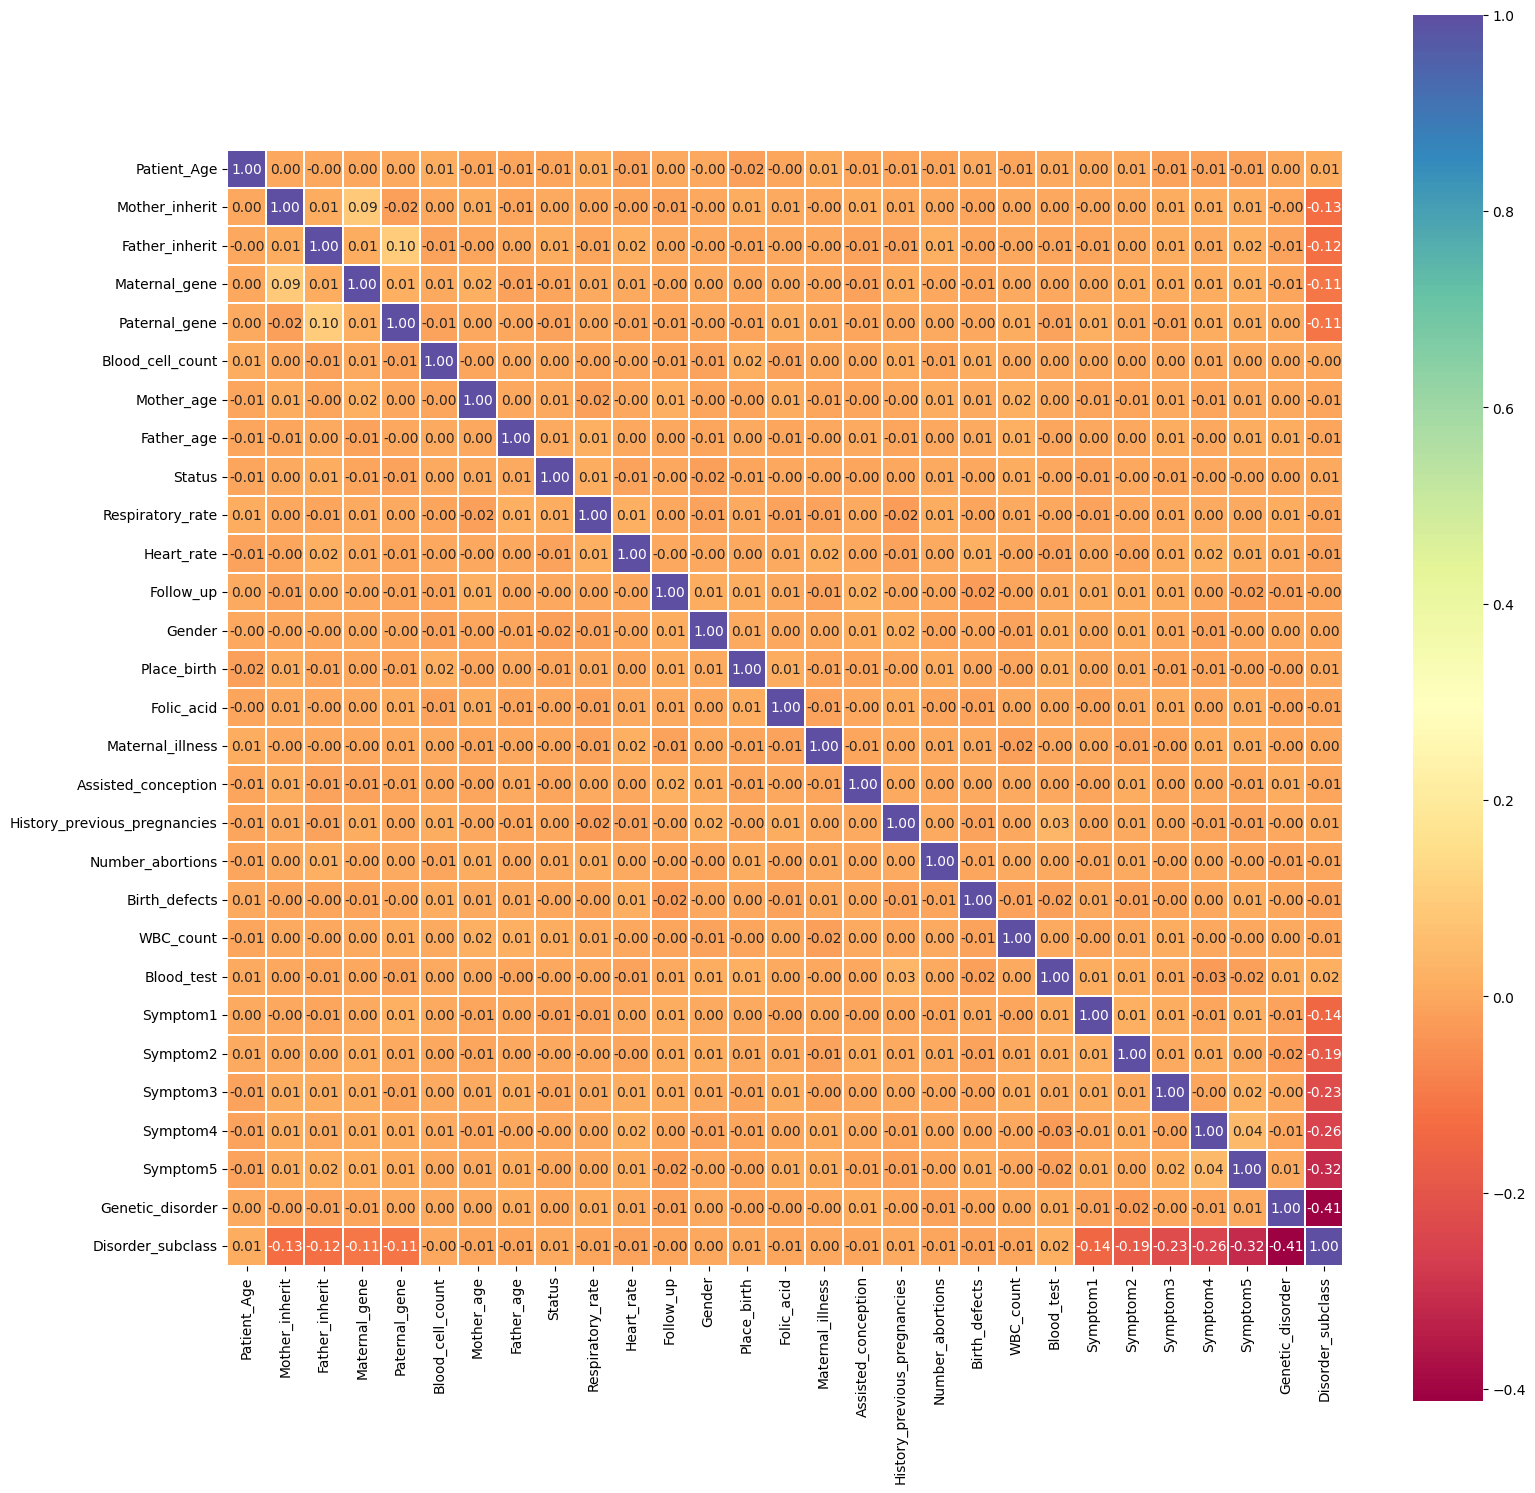

In [42]:
corrmat = df2.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, vmax=1, linewidths=0.1, square=True, cmap = 'Spectral', annot = True, fmt='.2f')

plt.savefig('../images/heatmap_labelencoder.png')

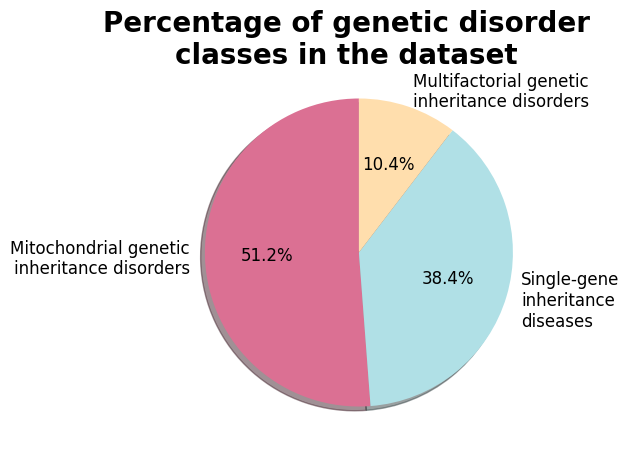

<Figure size 640x480 with 0 Axes>

In [43]:
df_pie = df2["Genetic_disorder"].value_counts().reset_index()
df_pie.columns = ["Genetic_disorder", "count"]

fig = plt.figure(figsize=(10,5))
fig.suptitle('Percentage of genetic disorder\nclasses in the dataset', fontsize=20, fontweight='bold', ha='center')
plt.pie(df_pie['count'],labels=['Mitochondrial genetic\ninheritance disorders','Single-gene\ninheritance\ndiseases','Multifactorial genetic\ninheritance disorders'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=('palevioletred','powderblue','navajowhite'), textprops={'fontsize': 12})
plt.show()

plt.savefig('../images/GenDisorder_pie.png')

In [44]:
df_pie2 = df1["Disorder_subclass"].value_counts().reset_index()
df_pie2.columns = ["Disorder_subclass", "count"]

fig = px.pie(df_pie2, values='count', names='Disorder_subclass', title='Percentage of disorder subclasses in the dataset',
        color_discrete_sequence=px.colors.sequential.Plasma, width=700, height=600)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), title={'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

# There is a disbalanced representation of disorder subclass in the dataset, Alzheimer and Cancer being the least represented groups
# This might affect the model performance. Some method (for example, oversampling or undersampling) should be applied to rebalance the dataset

plt.savefig('../images/DisorderSubclass_pie.png')

<Figure size 640x480 with 0 Axes>

In [45]:
# Save df2 as df_eda in data/processed

# Machine Learning

In [63]:
df_eda = pd.read_csv("../data/processed/df_eda.csv")

In [64]:
df_eda.columns

Index(['Patient_Age', 'Mother_inherit', 'Father_inherit', 'Maternal_gene',
       'Paternal_gene', 'Blood_cell_count', 'Mother_age', 'Father_age',
       'Status', 'Respiratory_rate', 'Heart_rate', 'Follow_up', 'Gender',
       'Place_birth', 'Folic_acid', 'Maternal_illness', 'Assisted_conception',
       'History_previous_pregnancies', 'Number_abortions', 'Birth_defects',
       'WBC_count', 'Blood_test', 'Symptom1', 'Symptom2', 'Symptom3',
       'Symptom4', 'Symptom5', 'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')

### Genetic disorder dataframe

In [47]:
# Create Genetic disorder dataframe
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)

# Split target column from the rest of the columns of the Genetic_disorder dataframe
Genetic_X = Genetic_disorder.drop(["Genetic_disorder"], axis=1)
Genetic_Y = Genetic_disorder["Genetic_disorder"]

# Standardize the data
Genetic_X_scaled = StandardScaler().fit_transform(Genetic_X)

# Divide dataframe into train and test sets
X_Gen_train, X_Gen_test, y_Gen_train, y_Gen_test = train_test_split(Genetic_X_scaled, Genetic_Y, test_size=0.2, random_state=42)

In [48]:
# Gradient Boosting Classifier for Genetic Disorder Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=10, random_state=42)
gb_Gen_model = gb.fit(X_Gen_train, y_Gen_train)

prediction = gb_Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Genetic Disorder Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

-------------------------------------------------------------
|Gradient Boosting Classifier for Genetic Disorder Dataframe|
-------------------------------------------------------------
Accuracy: 0.6673130193905817
Precision: 0.6358887338899177
Recall: 0.6673130193905817
F1 Score: 0.6030611336777714
R2 Cross Validation mean: 67.45152354570637
--------------------------------------------------------------------------



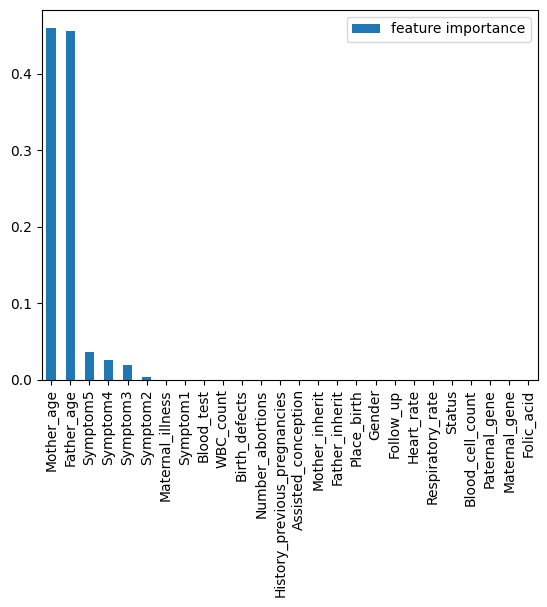

In [49]:
df_feature_importance = pd.DataFrame(gb_Gen_model.feature_importances_, index=Genetic_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

### Disorder Subclass dataframe

In [50]:
# Create Disorder Subclass dataframe
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

# Split target column from the rest of the columns of the Disorder_subclass dataframe
Subclass_X = Disorder_subclass.drop(["Disorder_subclass"], axis=1)
Subclass_Y = Disorder_subclass["Disorder_subclass"]

# Standardize the data
Subclass_X_scaled = StandardScaler().fit_transform(Subclass_X)

# Divide dataframe into train and test sets
X_Sub_train, X_Sub_test, y_Sub_train, y_Sub_test = train_test_split(Subclass_X_scaled, Subclass_Y, test_size=0.2, random_state=42)

In [51]:
# Gradient Boosting Classifier for Disorder Subclass Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, n_estimators=30, random_state=42)
gb_Sub_model = gb.fit(X_Sub_train, y_Sub_train)

prediction = gb_Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Disorder Subclass Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

--------------------------------------------------------------
|Gradient Boosting Classifier for Disorder Subclass Dataframe|
--------------------------------------------------------------
Accuracy: 0.6631578947368421
Precision: 0.6688875516412848
Recall: 0.6631578947368421
F1 Score: 0.6592257255683573
R2 Cross Validation mean: 64.65373961218836
--------------------------------------------------------------------------



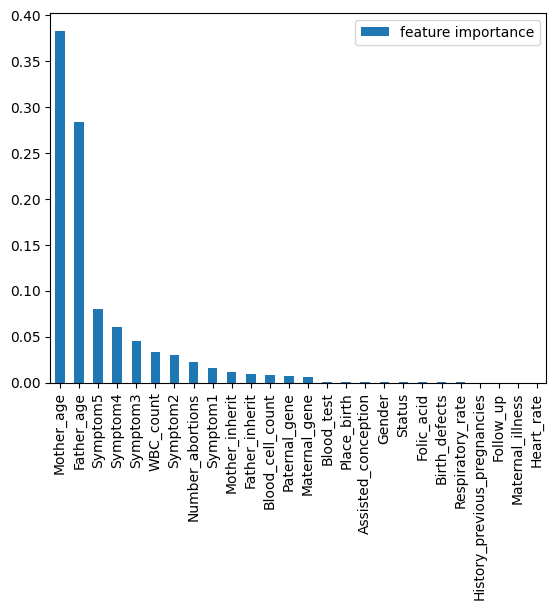

In [52]:
df_feature_importance = pd.DataFrame(gb_Sub_model.feature_importances_, index=Subclass_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

# Pipeline of the best models

In [53]:
pipeline_Gen = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=10, random_state=42))
    ])

In [54]:
pipeline_Sub = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(learning_rate=0.7, max_depth=2, n_estimators=30, random_state=42))
    ])

In [59]:
Gen_model_def = pipeline_Gen.fit(X_Gen_train, y_Gen_train)

with open('../model/genetic_model_def.pkl', 'wb') as f:
    pickle.dump(Gen_model_def, f)

In [60]:
Sub_model_def = pipeline_Sub.fit(X_Sub_train, y_Sub_train)

with open('../model/subclass_model_def.pkl', 'wb') as f:
    pickle.dump(Sub_model_def, f)

In [5]:
test = pd.read_csv("../data/raw/test.csv", index_col=0)
r1 = test.head(1)
r1

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Patient Id,,,,,,,,,,,,,,,,,,,,,
PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,38,...,-99,2,Multiple,-99.0,slightly abnormal,True,True,True,True,True


In [31]:
Genetic_X.head(1).reset_index().to_csv("../data/processed/Genetic_X.csv", index=False)